# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- The patient's no-show rate is a key performance indicator (KPI) that reflects the ability of healthcare service providers and institutes to offer professional healthcare services to their patients.
- Accordingly, it is important for healthcare service providers to study and analyze the factors that can potentially decrease the patient no-show rates
- This dataset presents information from more than 100,000 medical appointments in Brazil and aims to assess the medical appointment no-show rates and analyze the factors that could minimize the patient no-show rates. Several patient characteristics are presented in each row.
- This report should answer the major question " What factors are most important to increase the chances of a patient showing up for his scheduled appointment?
- In this project, I am analyzing data associated with one of the most important KPIs of healthcare systems namely; No_show rates n medical appointments and factors that could minimize these rates.
- In particular, the current project focuses on finding factors that could minimize the no-show rates in medical appointments.



# upgrading pandas

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


# Importing all the required packages

In [2]:
# To start we should import  all the packages needed for this project.
#Note: In "%matplotlib inline", I remmoved the space after "%": 
#to avoid the error that otherwise was thrown to my local jupyter notebook
#as advised by stackoverflow community
# seaborn was imported to make visualization more attractive
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Inspect the columns and few lines of the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Description of the columns
- PatientiD, AppointmentID are less relative to the project questions and can be deleted 

- ScheduledDay represents the day that the patient selected to plan for his appointment

- AppointmentDay represents the day of the actual patient visit.

- Scholarship represents patient enrollment in a social welfare program of the Government of Brazil (1=enrolled, 0=not enrolled)

- Hipertension: indicates whether the patient suffers from Hypertension (1 = True) or (0= False).

- Diabetes: indicates whether the patient suffers from Diabetes (1 = True) or (0= False).

- Handcap: indicates the number of patient disabilities where the patient suffers from no disability (0), one disability (1), 2 disabilities (2), 3 disabilities (3), or 4 disabilities (4)

- SMS_received indicates whether the patient received SMS (1) or not (0).

- No-show indicates whether the patient missed the appointment or not (this could be tricky).
"No-show = no" means that the patient attended his appointment
"NO-show = yes" means that the patient missed his appointment.

- Our most important goal is to study factors that could decrease the number of no_show rates

In [5]:
#explore the number of rows and columns
df.shape

(110527, 14)

According to the df shape, the current data frame presents 110527 rows (which represent medical appointments) and 14 columns

In [6]:
#explore datatypes in each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Most important findings from the dtype:
- Gender, Neighbourhood, and No_show are objects while the Age, hypertension, Diabetes, SMS-received etc are integers

In [7]:
# get a general idea on the stastics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Notes from Data wrangling :

- Age: the mean patient age is 37 years old (ranging from -1 to 115 years old, but it seems that one or more values = -1 which is not logical and needs to be deleted
- Although several project variables are categoric (yes = 1 and no = 0), their presentation as numbers 1 or 0 facilitates analyzing them numerically and describing them statistically by means, etc...
- Scholarship average = 0.098 (about 10% of the patients were enrolled in the Bolsa Família program.
- Hipertension: is mistyped and it is better to rename it into "Hypertension" and its average = 0.197 ((about 20% of the patients suffered from hypertension)
- Diabetes average = 0.07 (about 7% of the patients suffered from Diabetes).
- Handcap average = 0.02 (Majority of the patients had no disabilities) and ranged from 0 to 4 disabilities.
- SMS-receipt average = 0.32 (about 32% of the patients received SMS).
- No-show should be renamed into No_show to avoid code errors while used.
- The values of the No-show variable could be modified into "0" and "1" instead of "No" and "Yes" to facilitate their numerical calculation particularly the mean 
- From the df.head(), it seems that there is no benefit from analyzing PatientId and AppointmentID because they are irrelevant to the project question. So it is better to delete them to keep the project focused!
- Similarly, ScheduledDay and AppointmentDay are less relevant to the project questions and can be deleted.

In [8]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Accordingly, the df has no missing or nan values

In [9]:
# check again for null values in a different way
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All the non-values in rows equal to the total entries which confirm that there is no missing values in the data

In [10]:
# check for duplicates
sum(df.duplicated())


0

The above test shows that the data involve no duplicated rows.

# Data Cleaning
## - Removing irrlevant columns

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
# drop columns from the dataset, particularly from columns( axis=1) and inplace to modify the same df 
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [13]:
# confirm the deletion
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Deleting error values in Age

In [14]:
# the following code aims to remove all age values < 0 from the df
df = df.query('Age > 0')

In [15]:
# confirm the change
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

## Renaming Columns

In [16]:
# rename the column Hipertension into Hypertension
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [17]:
# rename the column No-show
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [18]:
# confirm the modification
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## Change datatype of No_show column

In [19]:
# convert No_show values into 0 and 1 to enable easier visualization
df['No_show'] = df['No_show'].replace(['Yes', 'No'], ['1', '0'])
# confirm the No_show values change
df.head(10)


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,F,76,REPÚBLICA,0,1,0,0,0,0,0
6,F,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,1
8,F,21,ANDORINHAS,0,0,0,0,0,0,0
9,F,19,CONQUISTA,0,0,0,0,0,0,0


In [20]:
#check for the No_show data type after change
df.dtypes

Gender           object
Age               int64
Neighbourhood    object
Scholarship       int64
Hypertension      int64
Diabetes          int64
Alcoholism        int64
Handcap           int64
SMS_received      int64
No_show          object
dtype: object

Its datatype remains object. So, datatype should be changed into integar

In [21]:
#change datatype into integar
df['No_show'] = df['No_show'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 10 columns):
Gender           106987 non-null object
Age              106987 non-null int64
Neighbourhood    106987 non-null object
Scholarship      106987 non-null int64
Hypertension     106987 non-null int64
Diabetes         106987 non-null int64
Alcoholism       106987 non-null int64
Handcap          106987 non-null int64
SMS_received     106987 non-null int64
No_show          106987 non-null int64
dtypes: int64(8), object(2)
memory usage: 9.0+ MB


In [22]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.202641
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


No_show was expressed numerically and its average = 0.20 (about 20% of the patients missed their appointments, which is in agreement with the previously reported rates)

In [23]:
# saving the final dataframe into a CSV file
df.to_csv('clean_copy_no_show_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 - What is the number and rate of appointment no_show?

In [24]:
#calculate total appointments number
total_appointments = df.No_show.count()
total_appointments

106987

In [25]:
# get the number of no_show counts for each color
No_show = df.groupby('No_show').count()['Age']
No_show

No_show
0    85307
1    21680
Name: Age, dtype: int64

In [26]:
# use masks to assign no show to missed
attended = df.No_show == 0
missed = df.No_show == 1

In [27]:
No_show_rate = missed.sum()/total_appointments*100
No_show_rate

20.26414424182377

Accordingly, the rate of appointment no_show = 20% which is matching with the analysis by df.describe function. 

### Q2- What are the factors that could potentially affect no_show rate?

In [28]:
# The following code utilizes the "for loop" function to avoid repetitive code in value_count calculation
# prting ------ line to visually organize the data
potential_factors = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Handcap', 'SMS_received', 'Neighbourhood']
for x in potential_factors:
    pf = df[x].value_counts()
    print(pf)
    print('--------------------------------------------------')

F    70118
M    36869
Name: Gender, dtype: int64
--------------------------------------------------
0    96178
1    10809
Name: Scholarship, dtype: int64
--------------------------------------------------
0    85186
1    21801
Name: Hypertension, dtype: int64
--------------------------------------------------
0    99044
1     7943
Name: Diabetes, dtype: int64
--------------------------------------------------
0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64
--------------------------------------------------
0    72402
1    34585
Name: SMS_received, dtype: int64
--------------------------------------------------
JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE

- The above value counts data are in agreement with the data presented by df.descrive function
- The Neighbourhood variable yielded a huge number of unique values (81) which limits the analysis of this factor

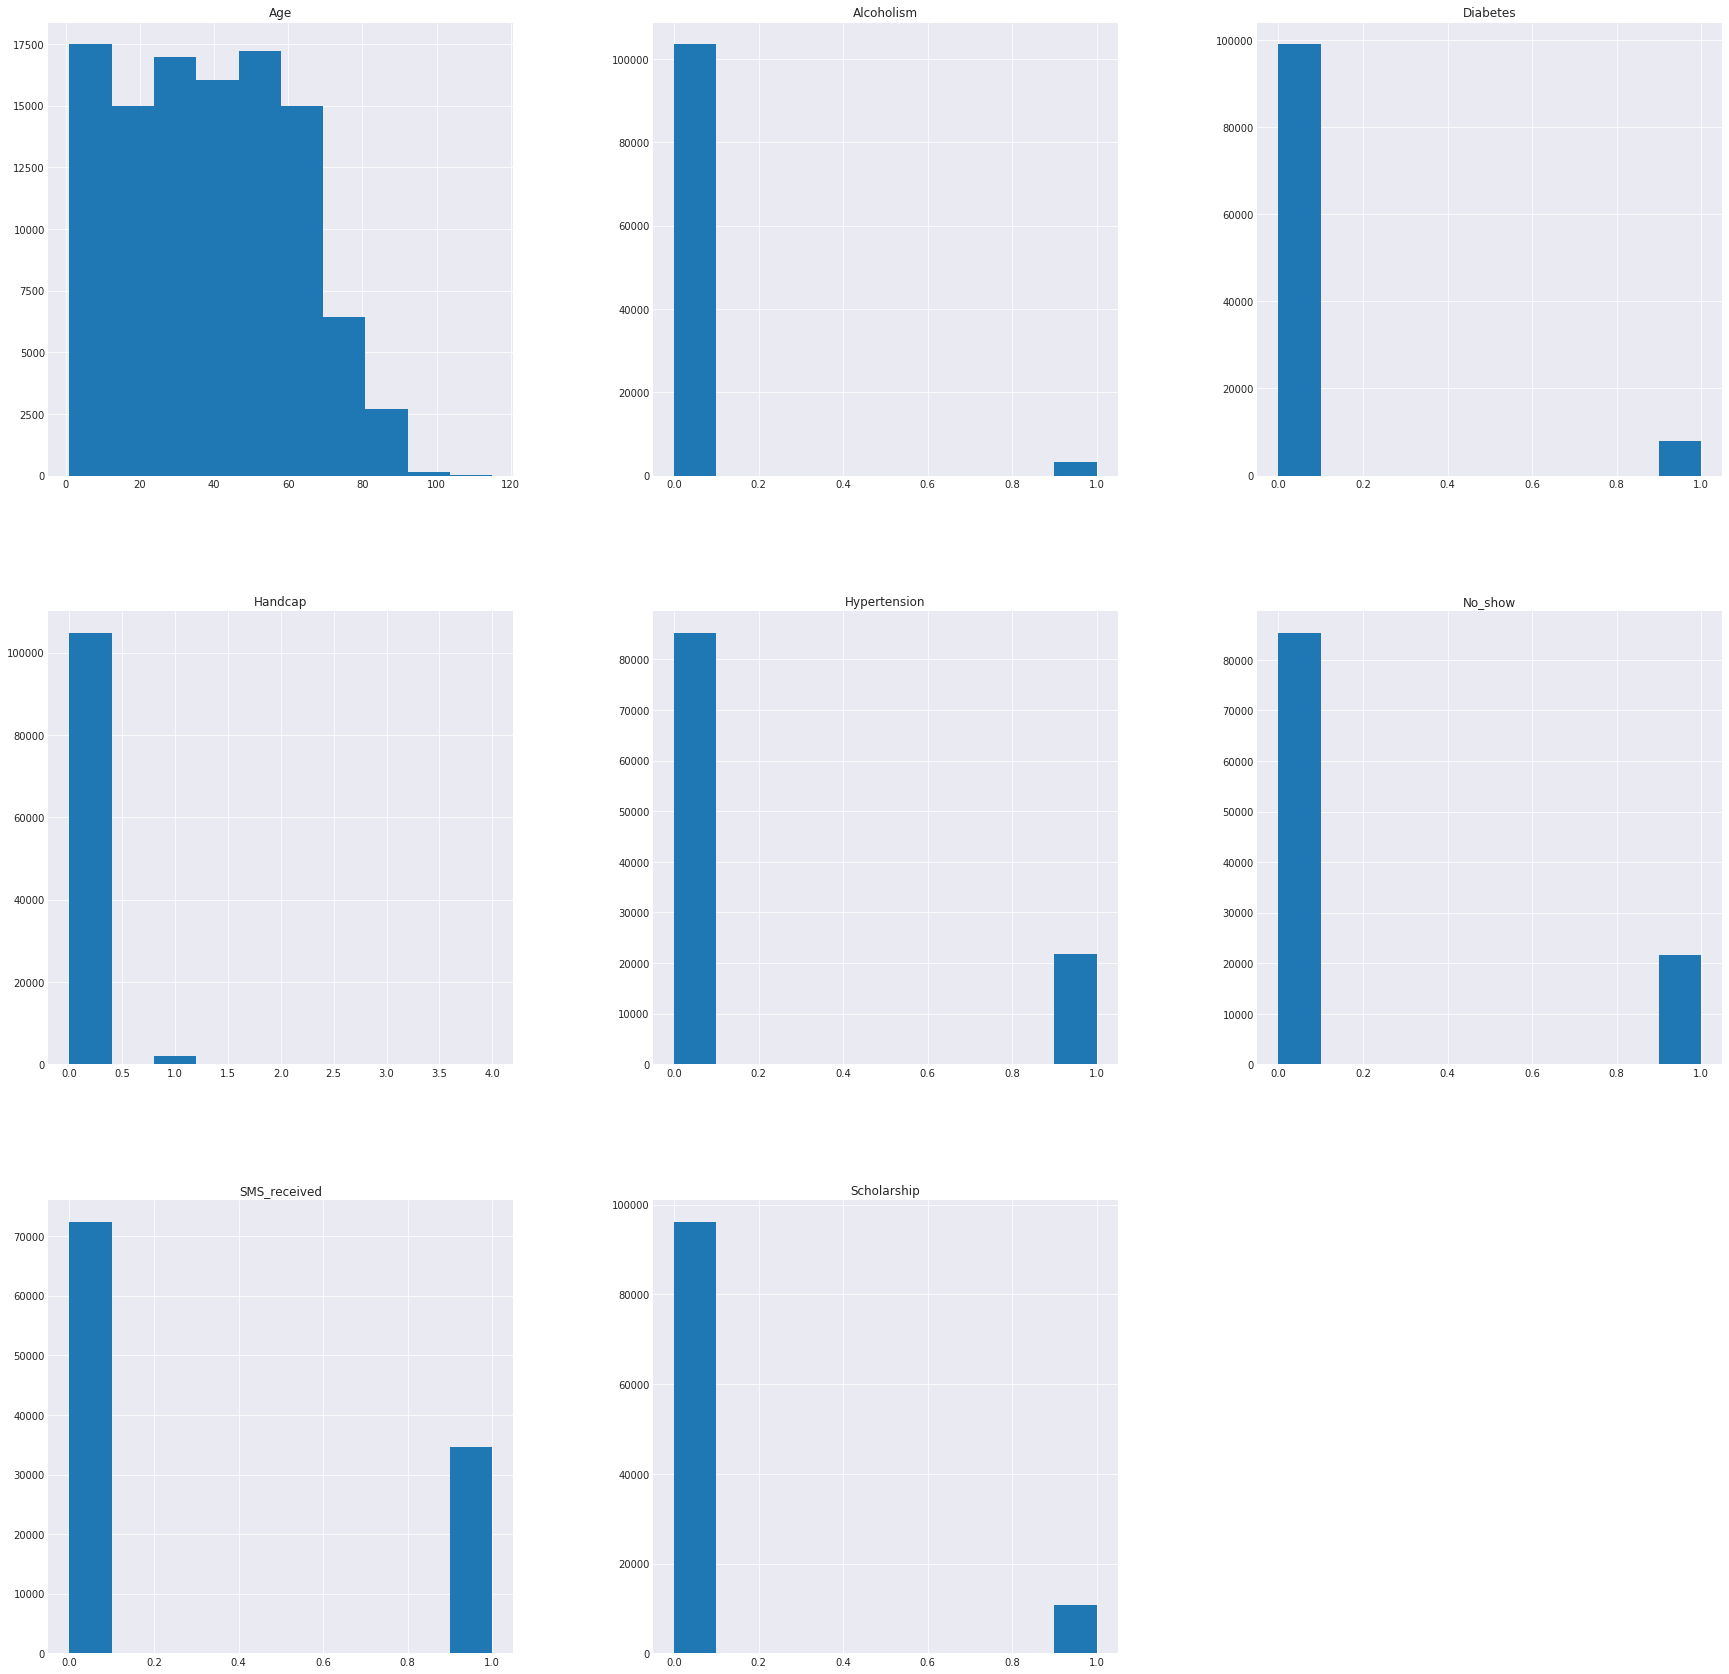

In [29]:
df.hist(figsize= (30,30));


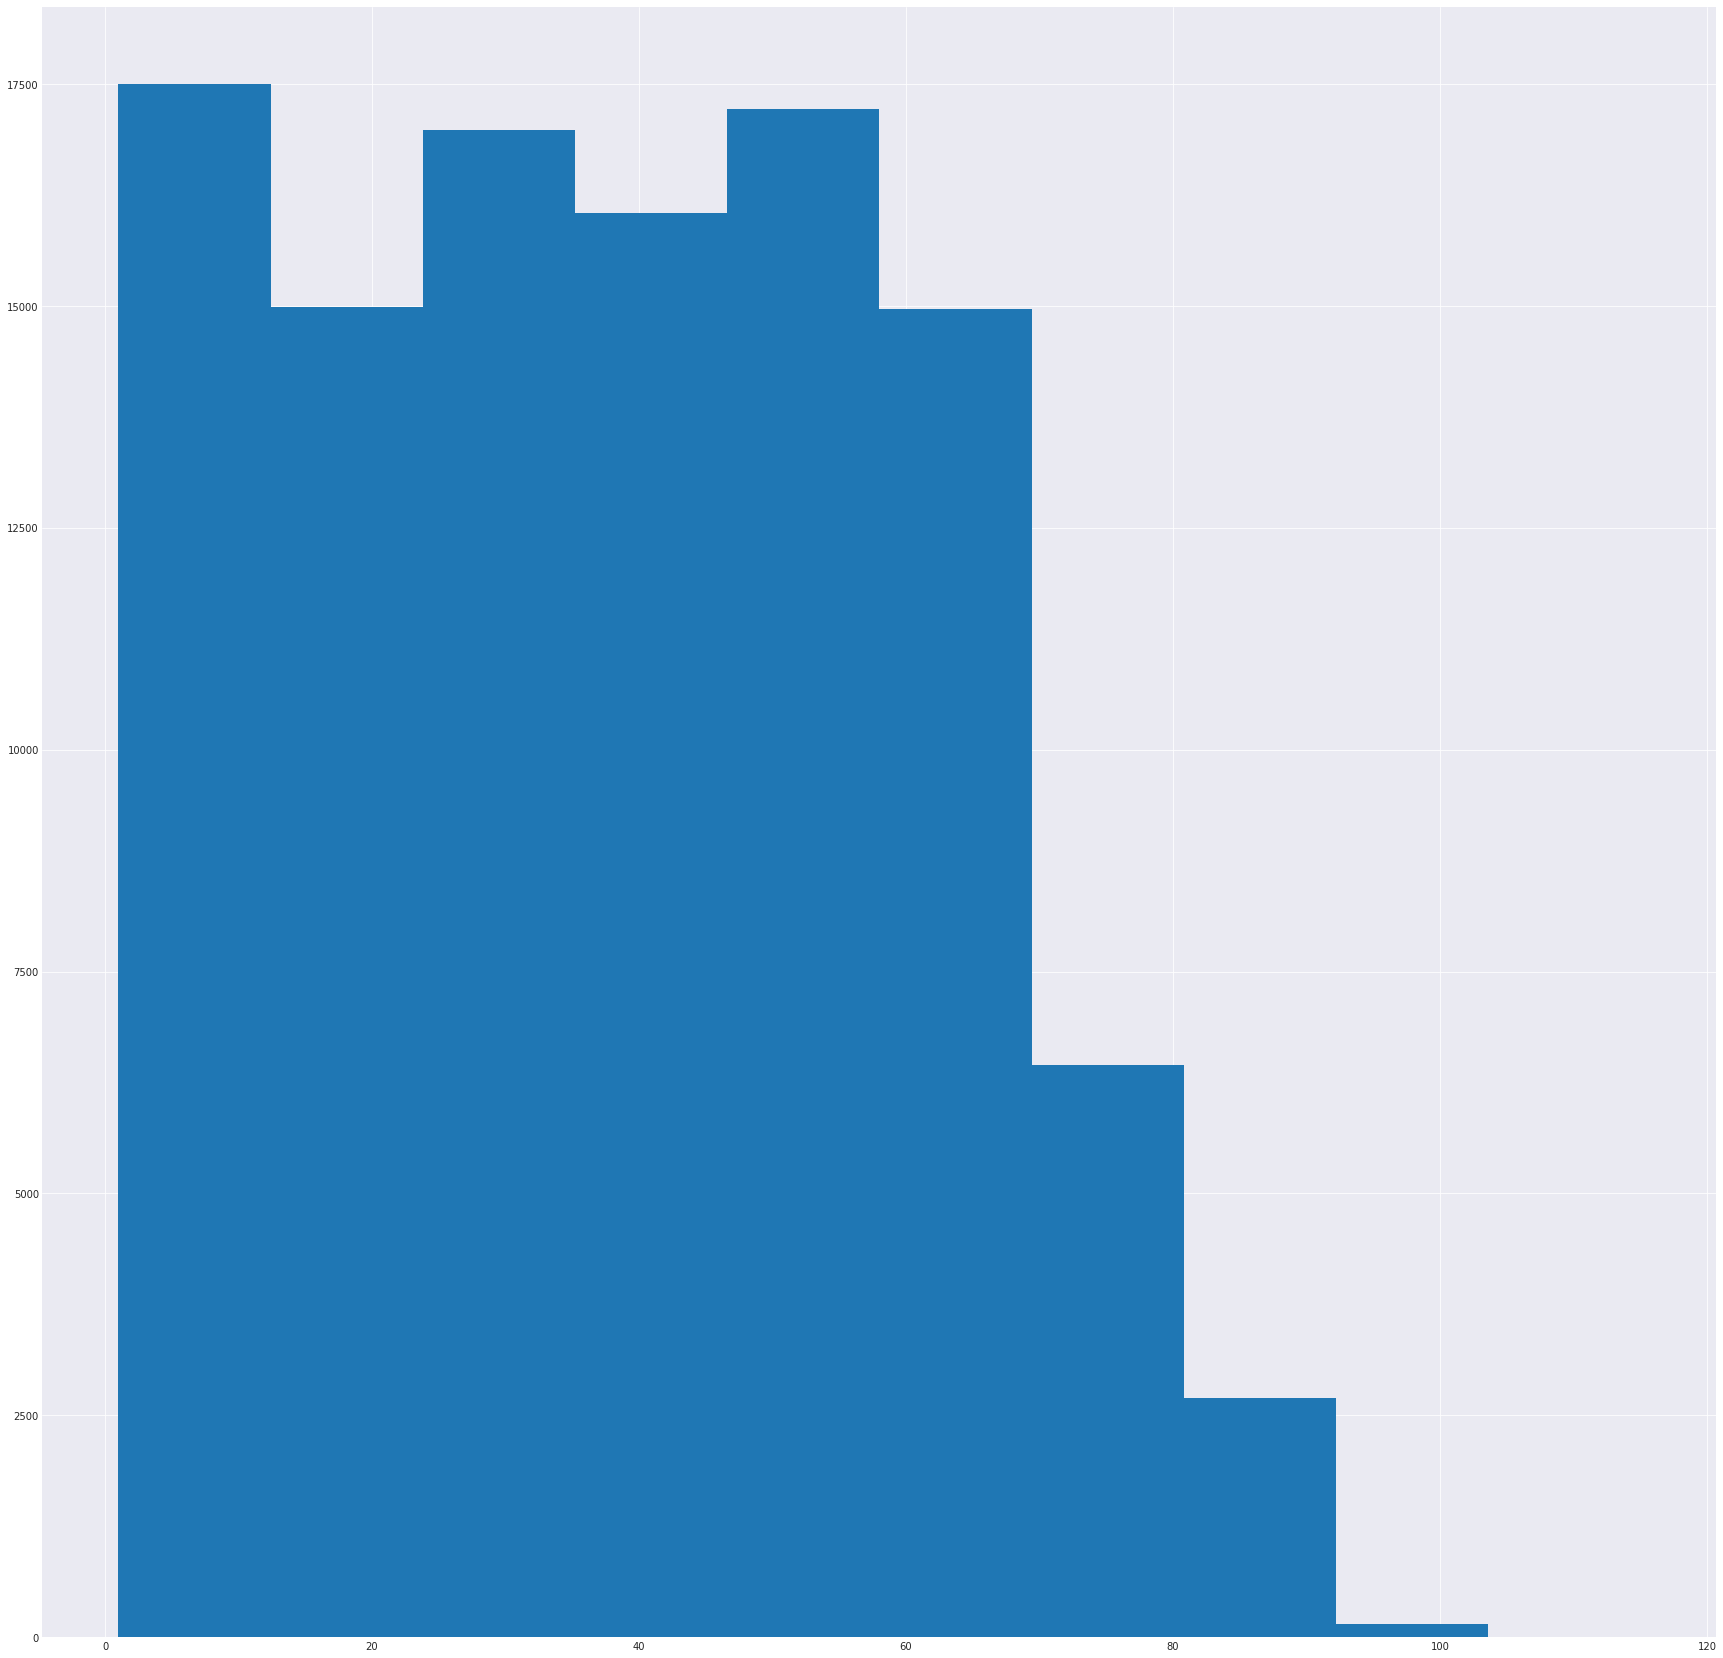

In [30]:
df.Age.hist(figsize= (30,30));


According to the above histograms, 
- Age seems to be right skewed where the majority of the patients are below 20 years old.
- The other histograms confirm the categorial property of the other variables being either (0 for false) or (1 for true)

### Effect of Age on no-show rate

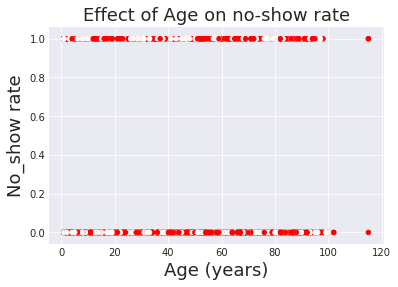

In [31]:
# The following plots aims to identify the factors that 
# can potentially affect no show rates
colors = ['red', 'white']
df.plot(x='Age', y= 'No_show', kind = 'scatter', color=colors);
plt.title("Effect of Age on no-show rate", fontsize=18)
plt.xlabel("Age (years)", fontsize=18)
plt.ylabel("No_show rate", fontsize=18);

From the above scatter graph, the age does not seem to have any significant effect on no_show rate

### Effect of different categorial factors on patient no-show rate

#### An example of a false interpretation of the effect of Gender

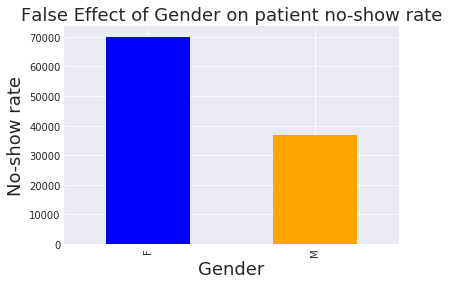

In [32]:
colors = ['blue', 'orange']
df.groupby('Gender').No_show.count().plot(kind= 'bar',color=colors)
plt.title("False Effect of Gender on patient no-show rate",fontsize=18)
plt.xlabel("Gender",fontsize=18)
plt.ylabel("No-show rate",fontsize=18); 

- The above bar graph is very tricky it represents one of the critical mistakes in data analysis because it compares the effect of gender no_show rate based on count which is very biased because if we revised the original data we found out the number of females enrolled in this study is significantly higher than males so by default more females count could be appearing in any studies compared to males.
- One of the good solutions, based on my point of view is to compare it based on mean, not counts (as follows).

#### The combined study of different factors on the no-show rate

In [33]:
# The following code define a new function namely'plot_mean' that just need to be called for each x-axis
# to avoid repetitive code in plotting multiple variables 
# Note: the y_axis is set to 'No_show' if that parameter is omitted in the function call
def plot_mean(x_axis, y_axis='No_show'):
    colors = ['blue', 'orange','green', 'red', 'brown']
    groups = df.groupby(x_axis)[y_axis].mean()
    plt.figure(figsize = (7, 5))
    groups.plot(kind='bar', color=colors)
    plt.title('Effect of {} on patient {} rate'.format(x_axis, y_axis), fontsize=18)
    plt.xlabel(x_axis, fontsize=18)
    plt.ylabel('{} rate'.format(y_axis), fontsize=18);


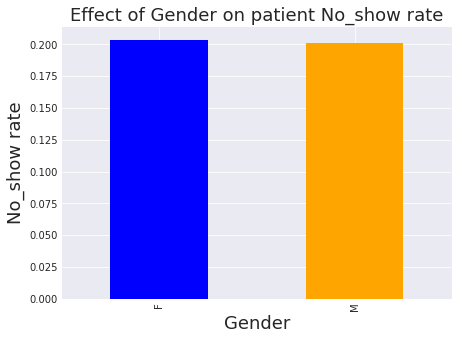

In [34]:
plot_mean('Gender')

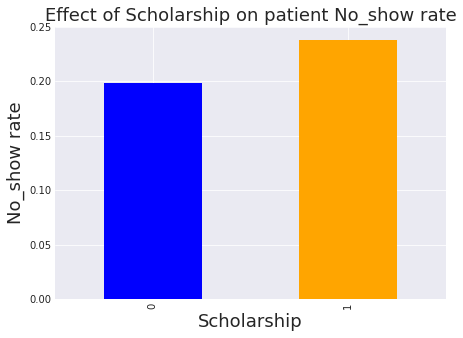

In [35]:
plot_mean('Scholarship')

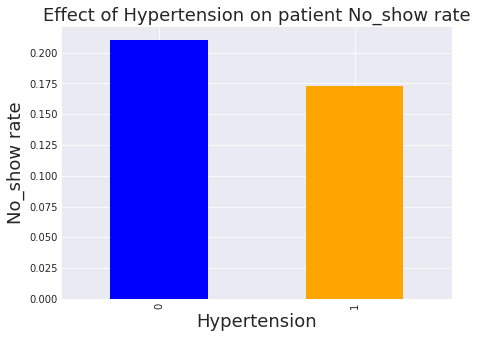

In [36]:
plot_mean('Hypertension')

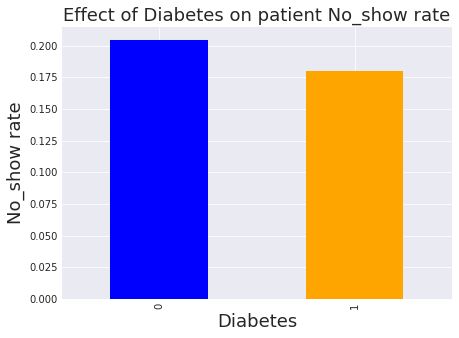

In [37]:
plot_mean('Diabetes')

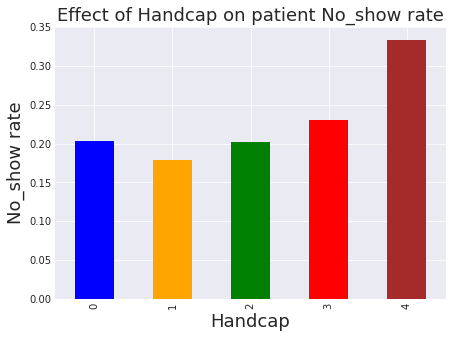

In [38]:
plot_mean('Handcap')

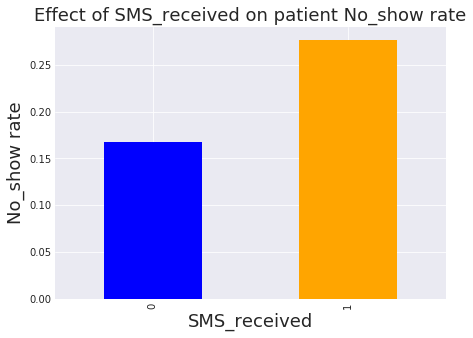

In [39]:
plot_mean('SMS_received')

### Results Interpretation

- As we can see from the gender graph, the analysis based on the mean showed a far different data presentation. Accordingly, all the subsequent analyses were conducted based on mean, not counts (as follows).
- Gender seems to have a minor effect on the no-show rate.
- Scholarship seems to have a considerable effect on the no-show rate where the enrolled patients seem to have a higher appointment no-show rate
- Hypertension seems to have a considerable effect on the no-show rate whereas patients with no hypertension seem to have a higher appointment no-show rate. 
- Diabetes seems to have a considerable effect on the no-show rate whereas patients with no diabetes seem to have a higher appointment no-show rate.
- Handicap seems to have a considerable effect on the no_show rate where patients 4 disabilities showed the highest no_show rates. However, it should be noted that these patients' numbers were very low (3 appointments only).
- SMS_receive showed the strongest effect on the no_show rate whereas patients who received SMS showed around a 2-fold increment in appointment no-show rate. 

### The Average Patients Age based on Gender

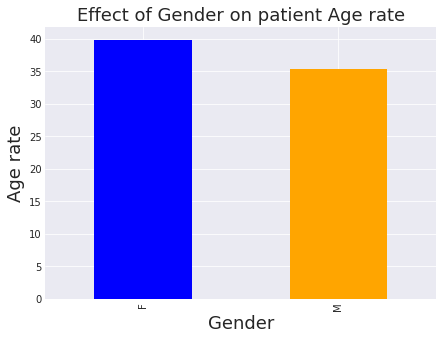

In [40]:
# An example of using the defined function 'plot_mean' by calling both x_axis and y_axis
# which overwrites the default y_axis value 'No_show' and replace it with 'Age'
plot_mean('Gender', 'Age')

From the above graph, female patients seems to have higher average age compared to males.

<a id='conclusions'></a>
## Conclusions
- From the abovementioned data, we can conclude that this study showed about a 20% no-shows rate which is in agreement with the previously published rates.
- The patient's age and gender showed no considerable effects on the no-show rate. - - On the other hand, scholarship enrollment, hypertension, diabetes, and handicap showed considerable effects on no-show rates
- Most importantly, SMS receive showed the strongest effect on no-show rates. Patients who received SMS showed about a 2-fold increment in no-show rates. This could suggest that the SMS contained an appointment cancellation or rescheduling notification. 

<a id='Limitations'></a>
## Limitations

- It is worth mentioning that the current study did not apply statistical testing to assess whether there are significant differences between the means or not. Accordingly, we can not confirm whether any of the discussed variables possess a significant effect on no-show rates.
- The analysis of the 'Neighbourhood' variable yielded a huge number of unique values (81) which limits the possibility of analyzing the effect of the Neighbourhood variable on the no-show rate. Therefore, further deep analysis of this variable is required. This could be achieved by grouping these neighborhoods into 3-5 groups (based on towns or cities). This could enable a more feasible analysis of the effect of the Neighbourhood variable on no-show rates.

## REFERENCES
Leila F. Dantas, Julia L. Fleck, Fernando L. Cyrino Oliveira, Silvio Hamacher,
No-shows in appointment scheduling – a systematic literature review,
Health Policy,
Volume 122, Issue 4,
2018,

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project_Appointment_No_Show.ipynb'])

255